In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb

In [3]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [4]:
train = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")

In [5]:
df = train.copy()

In [6]:
cat_cols = ['Stage_fear', 'Drained_after_socializing']
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency']

In [7]:
for col in num_cols:
    train[col].fillna(train[col].mean(), inplace=True)
    test[col].fillna(train[col].mean(), inplace=True)

for col in cat_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(train[col].mode()[0], inplace=True)

In [8]:
for col in cat_cols:
    train[col] = train[col].map({'Yes': 1, 'No': 0})
    test[col] = test[col].map({'Yes': 1, 'No': 0})

In [9]:
le = LabelEncoder()
train['Personality'] = le.fit_transform(train['Personality'])

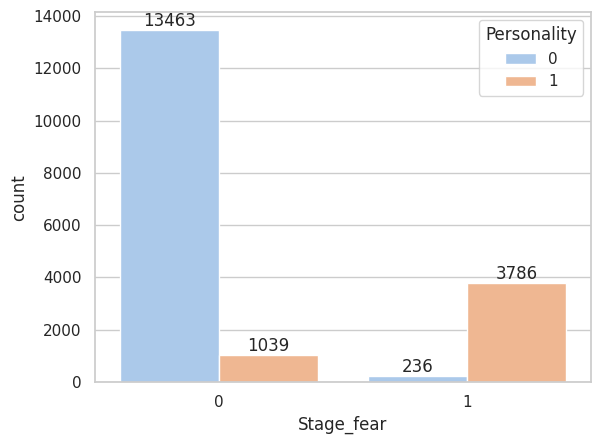

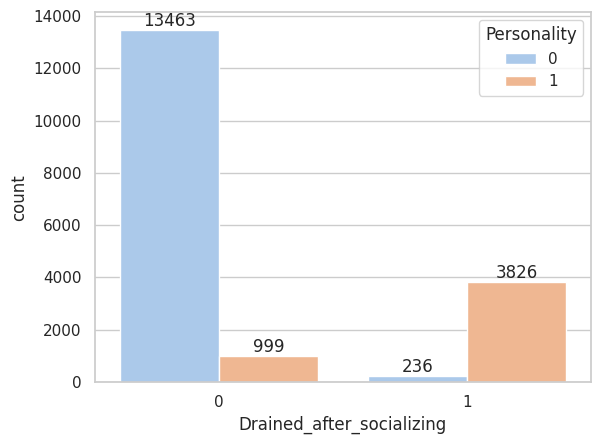

In [10]:
for col in cat_cols:
    ax = sns.countplot(x=col, data=train, hue='Personality', palette='pastel')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

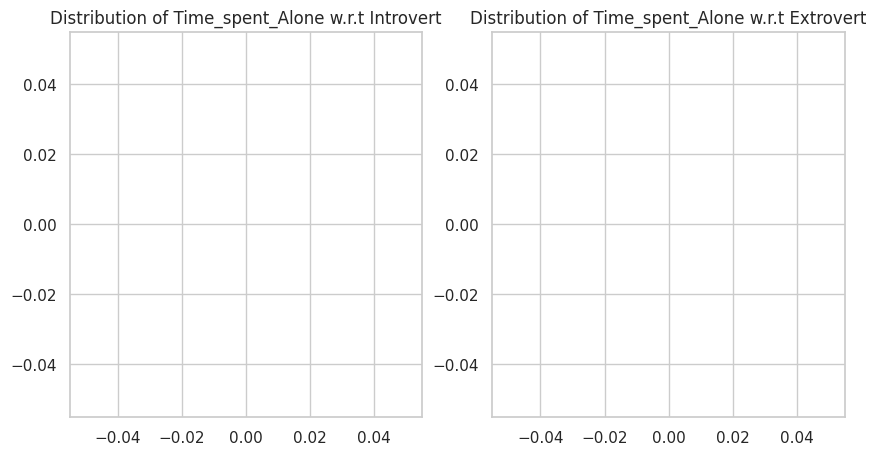

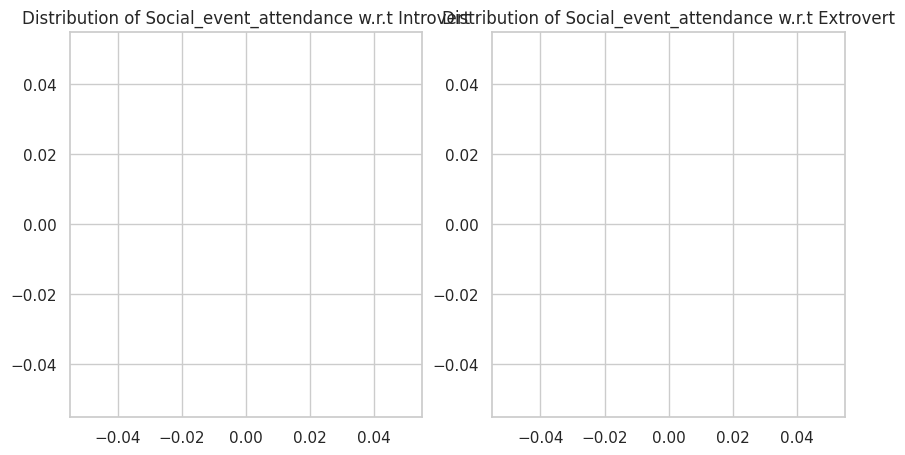

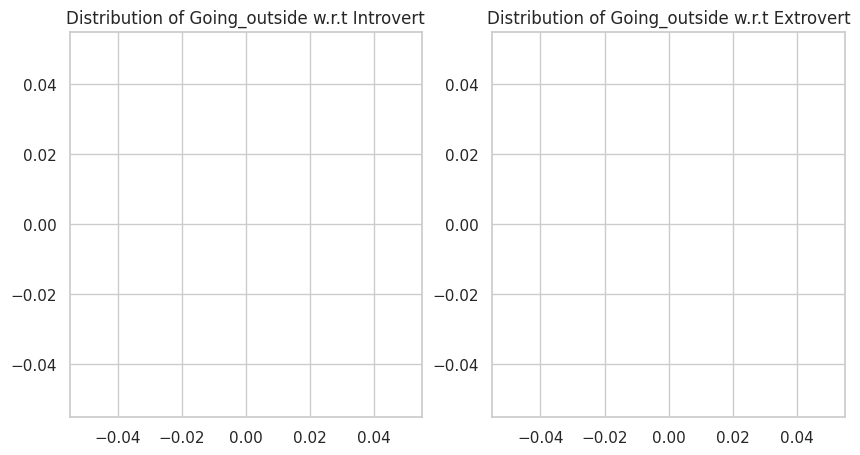

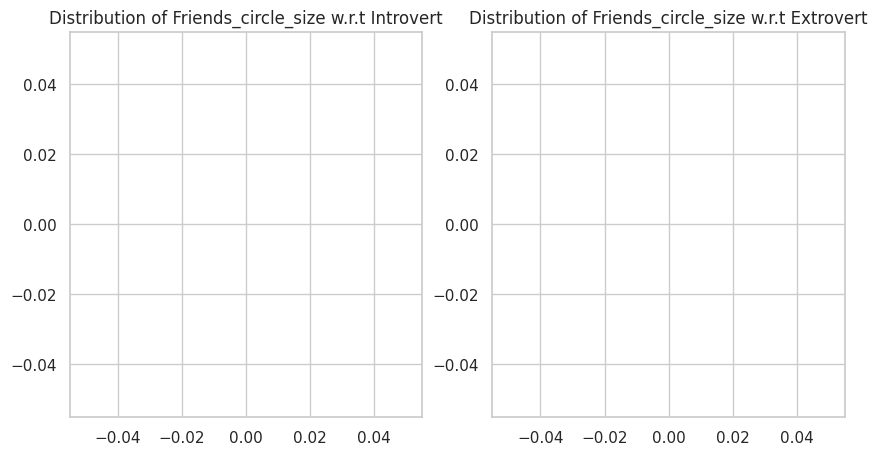

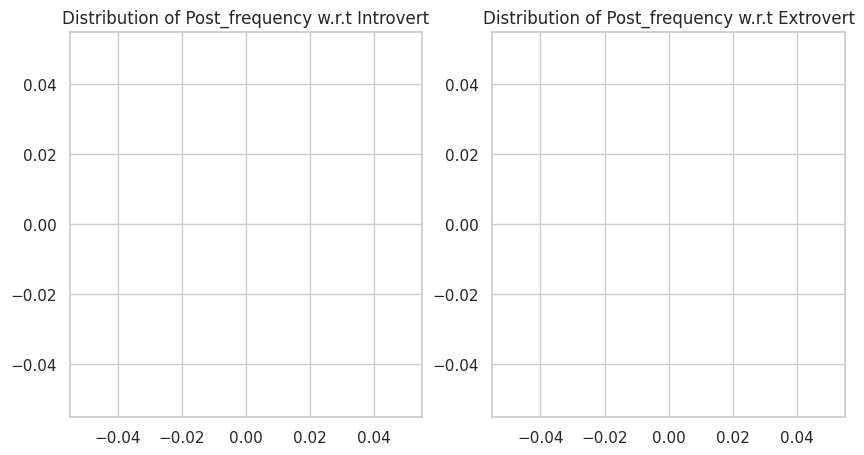

In [11]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, kde=True, data=df[df.Personality == 1], bins=df[col].nunique())
    plt.title(f'Distribution of {col} w.r.t Introvert')

    plt.subplot(1, 2, 2)
    sns.histplot(x=col, kde=True, data=df[df.Personality == 0], bins=df[col].nunique())
    plt.title(f'Distribution of {col} w.r.t Extrovert')
    plt.show()

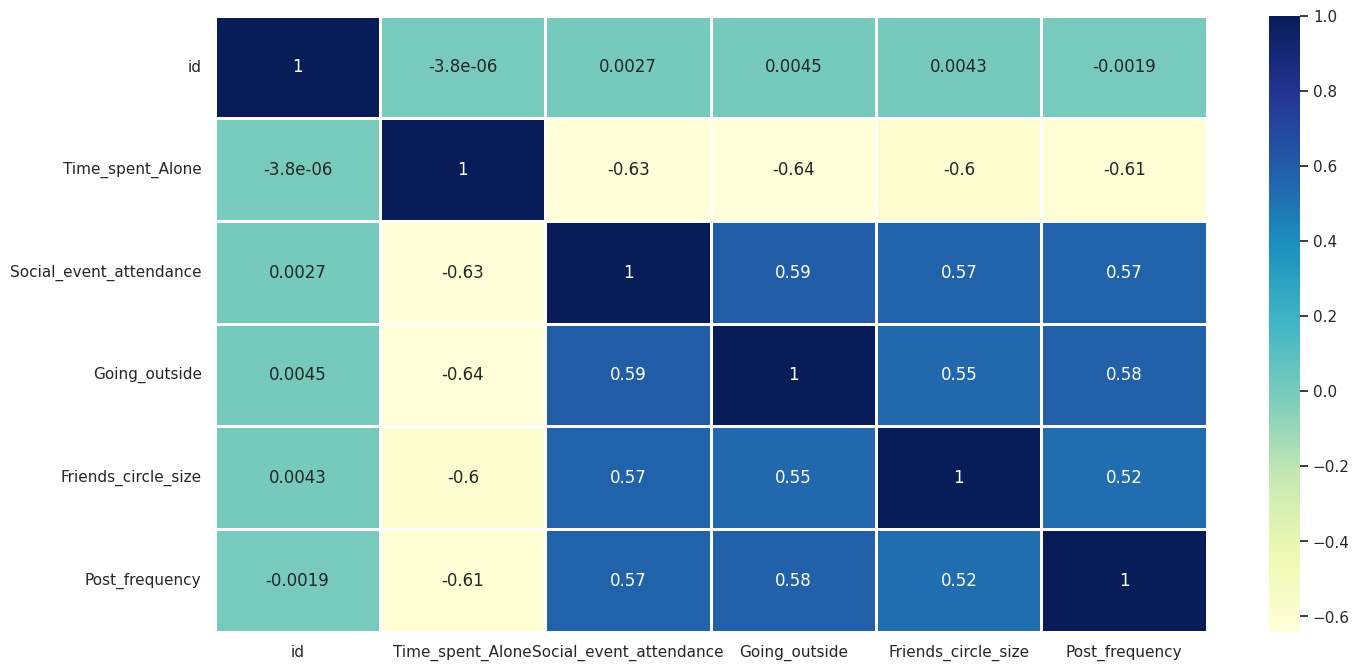

In [12]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True, linewidths=0.75)
plt.show()

In [13]:
X = train.drop(['id', 'Personality'], axis=1)
y = train['Personality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [16]:
y_test_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", acc)

Validation Accuracy: 0.9665317139001349


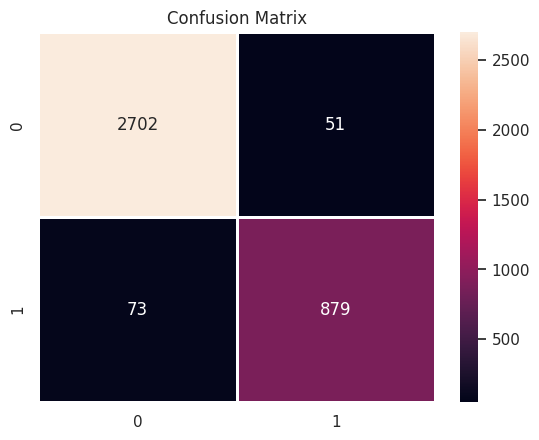

In [17]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, linewidth=0.75, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [18]:
final_test = test.drop('id', axis=1)
final_preds = model.predict(final_test)

In [19]:
final_labels = le.inverse_transform(final_preds)
submission = pd.DataFrame({
    'id': test['id'],
    'Personality': final_labels
})

In [20]:
submission.to_csv("submission_trait.csv", index=False)
print("submission_trait.csv ready to upload!")

submission_trait.csv ready to upload!
